<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Informe_Rod_Cutting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CuttingRod***

## 1. **Problema:** *Corte de varillas*

El problema consiste en encontrar la forma en la cual, dada una varilla de largo $n$ y una tabla de precios $p_i$ para $i =1,2...$ representando un costo asociado, encontrar la ganancia máxima posible al vender las varillas. <br><br>

---

<br>***Entrada***: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

***Salida***:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.<br><br>

---
<br>

Distintas particiones de las varillas presentarán distintos valores asociados.

<center>
<img src = "https://www.codesdope.com/staticroot/images/algorithm/rod2.png">
</center>




## 2. ***CuttingRod***


### 2.1 *Código*


Implementación *número 1*, resolución recursiva para el problema.

*Fuerza bruta*

In [1]:
def RecursiveCutRod(p,n, verbose = False, j = 1, cad = ""):

    if verbose == True and j == 1:
        print("Arreglo de precios por valor largo i:")
        print(p)
        print()
        print(f"Largo de la varilla = {n}\n")

    if verbose == True and j > 1:
        print(f"Llamada recursiva numero {j}")
        print(f"Tamaño de n = {n}")
        print(f"Rama : {cad} {n} ")

        print()


    if n == 0:
        return 0, j, []
        
    q = 0
    cf = []  # Cortes finales
    for i in range(1,n+1):

        # Llamada recursiva retorna maximo, iteraciones y cortes
        r, j , c= RecursiveCutRod(p,n-i, j = j+1, verbose = verbose, cad = cad + f' {n}')

        if q > p[i-1] + r:
            q = q

        else:
            q = p[i-1] + r
            cf = [i] + c

    
    if verbose == True and j == 1:
        print(f"Se ha calculado el maximo {q} con {j} llamadas recursivas")
        print(f"Los cortes son : {cf}")
        

    return q, j, cf

p = [1,5,8,9,10,17,17,20,24,30]
n = 4


mx, ll , ct= RecursiveCutRod(p,n)
print(f"Se ha calculado el maximo {mx} con {ll} llamadas recursivas")
print(f"Los cortes son : {ct}")

Se ha calculado el maximo 10 con 16 llamadas recursivas
Los cortes son : [2, 2]


Implementación *número 2,* acercamiento *bottom up* con programación dinámica.



In [2]:
def BottomUpCutRod(p, n, verbose = False):

    if verbose == True:
        a = [a for a in range(1,n+1)]
        print("Tamaño de cortes vs. Precio")
        print(f"    c : {a}")
        print(f"    p : {p}")
        print(f"\nTamaño de la barilla: {n}\n")
        print(f"------------------------------------------------\n")

    r = [0] * (n+1)                 # Creacion de arreglo de maximos
    s = [[]] * (n+1)                # Creacion arreglo de cortes
    neg = sum(p) *-1
    sp = 0                          # Contador de sub problemas

    for j in range (1,n+1):         # Iteracion para calcular cada maximo r_j
        
        sp = sp + 1

        if verbose == True:
            print(f"Subproblema {j}\n")

        q = neg                     # Establecer un valor negativo
        c = [n]                     # Establecer el arreglo de cortes base

        if j == 1:               
            r[1] = p[0]
            s[1] = [1]

            if verbose == True :
                print(f"    Primer corte vale = {r[1]}")
                print(f"    Los cortes son {s[1]}\n")  

            continue
        
        for i in range(1, j+1):     # Loop para encontrar el maximo r- entre las posibilidades
            

            q2 = p[i-1] + r[j-i]

            if verbose == True:
                print(f"    i = {i}\n")
                print(f"    Comparando valor anterior q = {q}")
                print(f"    con la suma de las varillas p[{i}] + n[{j}-{i}] = {q2}\n")
            
            if q > q2 :

                if verbose == True :
                    print(f"    No se ha modificado q")
                    print(f"    Retorno maximo al momento = {q}")
                    print(f"    Cortes realizados: {c}\n")

                q = q
                c = c
            
            else:

                q = q2
                
                if i == 0 :
                    c = []
                else :
                    c = [i]

                for x in s[j-i]:
                    c.append(x)

                if verbose == True :
                    print(f"    Se ha modificado q")
                    print(f"    Retorno maximo al momento = {q2}")
                    print(f"    Cortes realizados: {c}\n")

        if verbose == True: 
            print(f"------------------------------------------------\n")

        r[j] = q
        s[j] = c
    
    if verbose == True:
        print(f"\nCantidad de subproblemas calculados : {sp}")
        print(f"Retorno maximo posible: {r[n]}")
        print(f"Tamaño de las varas luego de los cortes: {s[n]}")

    return r[n], s[n], sp


# Ejemplo

p = [1,5,8,9,10,17,17,20,24,30]
n = 9

retorno, cortes , sp = BottomUpCutRod(p,n)

print("Retorno maximo para ", n, "elementos : ", retorno)
print("Largo de los cortes : ", cortes)

Retorno maximo para  9 elementos :  25
Largo de los cortes :  [6, 3]


### 2.2 *Descripción del algoritmo*
Dada la superposición de subproblemas, el paradigma *divide y vencerás* ya no resuelve el problema inicial de forma eficiente. Es necesario entonces definir una solución usando el paradigma ***programación dinámica***, donde se resuelven subproblemas de forma similar al paradigma anterior, pero se almacenan sus resultados para evitar el cálculo redundante.

Se consideran los siguientes pasos para el desarollo de la solución óptima:<br><br>

---

<br><br>

**Caracterización de la estructura para una solución óptima** 

Dada una varilla de largo $n$, se pueden visualizar dos situaciones: El retorno máximo $r_n$ está dado por  la varilla completa o por la sub-varilla $p_i$ y el retorno máximo del sobrante $r_{n-i}$.


$r_n = max(p_n, p[i] + r_{n-i})$


Se nota que para resolver el problema de tamaño $n$ *($r_n$)*, se resuelven problemas de menor tamaño pero del mismo tipo *($r_{n-i}$)*. La solución óptima incorpora soluciones óptimas de los sub-problemas que se resuelven independientemente, maximizando el valor obtenido para cada uno. Por lo tanto, el problema de cortar varillas presenta una sub-estructura óptima.<br><br>

**Definición del valor óptimo de manera recursiva**

Luego, se define el valor óptimo de manera recursiva.


$r_n=\max\limits_{1 \le i\le n}(p_i+r_{n-i})$

En esta versión recursiva, se realiza una descomposicion del problema en función del índice $i$. Se considera un trozo inicial $p_i$ al cual se le debe sumar la solución óptima del sobrante $r_{n-i}$, que se calcula recursivamente.
Como $1\le i\le n$, cuando $i=n$ se tendrá considerado el valor de la varilla completa, asumiendo que $r_0 = 0$ 

<center>
<img src='https://pencilprogrammer.com/wp-content/uploads/2020/11/recursive-rod-cut-peice.png'><br><br>
</center>

El siguiente árbol de recursión representa de forma visual todas las llamadas realizadas por la versión recursiva de la solución del problema. Se observa claramente como se han tenido que calcular múltiples veces los mismos sub-problemas.

<center>
<div class="img-with-text">
    <img src="https://i.imgur.com/RS6T426.png" />
    <p><center>Fuente: Introduction to Algorithms</center></p>
</div><br><br>
</center>

**Cálculo del valor de la solución óptima**

Al analizar el tiempo de ejecución de la versión recursiva se nota que aumenta de forma exponencial cada vez que se aumenta $n$ en una unidad. 

Observando el solapamiento de sub-problemas, se puede diseñar una mejor versión del algoritmo al calcular cualquier subproblema **solo una vez**, guardando su solución. De esta forma se realiza un intercambio entre el tiempo de ejecución y la memoria utilizada por el algoritmo.

Observando que para resolver el problema para $n$ hay que resolver aquellos más pequeños, la solución *bottom-up (abajo hacia arriba)* sería la siguiente:

* Ordenar sub_problemas desde el más pequeño al mayor
* Guardar resultados
* Calcular problemas mayores con resultados anteriores

<center>
<div class="img-with-text">
    <img src="https://i.imgur.com/ZN2EBhV.png" />
    <p><center>Fuente: Introduction to Algorithms</center></p>
</div><br><br>
</center>

La imagen representa la dependencia entre sub-problemas. Por ejemplo, se nota que el sub-problema $3$ utiliza todos sus predecesores.<br><br>


**Construcción óptima a partir de la información calculada**

Para finalizar, se realiza la solución óptima asumiendo que cada problema $j$ será menor que el sub-problema $j+1$.


> * Se crea un arreglo $r[0...n]$ de $n+1$ elementos, que almacenará el resultado de los problemas calculados $r_1, r_2.. r_n$
>
> * Se asume que $r_0 = 0$, por lo que $r[0] = 0$. *(La ganancia al vender 0 es 0)*
>
> * Se resuelven los problemas de menor a mayor, es decir, desde $j = 0, 1, 2...n$, donde $n$ es el tamaño máximo del problema. 
>
> * Se define $q$, que corresponde al retorno máximo temporal mientras no se consideren todas las combinaciones de $p[i]$ y $r[j-i]$. Se inicializa con un valor negativo o desconocido ya que aún no se han calculado posibles valores.
> 
> * Para cada iteración de $j$, hay que iterar $i = 1, 2... j$  veces extra con tal de considerar todas las combinaciones de sub-problemas posibles. El retorno máximo se tiene que calcular iteradamente por: $q = max(q, p[i] + r_{j-i})$, donde:
>     * $q$ es el máximo actual
>     * $p[i]$ es el precio de una varilla de tamaño $i$
>     * $r_{j-1}$ es el retorno máximo del sobrante, a través del arreglo de máximos previamente calculados
>
> * Una vez calculados todas las $j$ combinaciones posibles, se modifica la posición $j$ del arreglo de máximos $r$ asignándole el valor $q$
>
> * Se sigue iterando hasta que $j=n$, el retorno máximo será $r[n]$

<br>




### 2.3 *Ejemplo*

El siguiente ejemplo muestra el funcionamiento del algoritmo en su versión ***bottom-up***:<br><br>

--- 
<br>
Sea 


<center>
<div class="img-with-text">
    <img src="https://pencilprogrammer.com/wp-content/uploads/2020/11/Rod-Cutting-Problem-1.png" />
</div><br><br>
</center>

el vector de precios asociado a este problema y el tamaño original $n$ a optimizar -> $4$.

* Se define el arreglo con las soluciones: $r = [0,0,0,0,0]$

* Se asigna $r[0] = 0$

<br>

---

<br>

Primer problema, **j = 1**

$q = -∞$

> $i = 1$ 
>
> $q = max(q, p[1] + r[0])$
>
> ---> $q=1$

Como $i=j$, fin de la iteración

$r = [0,1,0,0,0]$

<br>

---

<br>

Segundo problema, **j = 2**

$q = -∞$

> $i = 1$ 
>
> $q = max(q, p[1] + r[1])$
>
> ---> $q=2$

> $i = 2$ 
>
> $q = max(q, p[2] + r[0])$
>
> ---> $q=5$

Como $i=j$, fin de la iteración

$r = [0,1,5,0,0]$

<br>

---

<br>

Tercer problema, **j = 3**

$q = -∞$

> $i = 1$ 
>
> $q = max(q, p[1] + r[2])$
>
> ---> $q=6$

> $i = 2$ 
>
> $q = max(q, p[2] + r[1])$
>
> ---> $q=6$

> $i = 3$ 
>
> $q = max(q, p[3] + r[0])$
>
> ---> $q=8$

Como $i=j$, fin de la iteración

$r = [0,1,5,8,0]$

<br>

---

<br>

Cuarto problema, **j = 4**

$q = -∞$

> $i = 1$ 
>
> $q = max(q, p[1] + r[3])$
>
> ---> $q=9$

> $i = 2$ 
>
> $q = max(q, p[2] + r[2])$
>
> ---> $q=10$

> $i = 3$ 
>
> $q = max(q, p[3] + r[1])$
>
> ---> 9, no se actualiza $q$

> $i = 4$ 
>
> $q = max(q, p[4] + r[0])$
>
> ---> 9, no se actualiza $q$

Como $i=j$, fin de la iteración

$r = [0,1,5,8,10]$

<br>

---
<br>

$r[n] = 10$, el retorno máximo para una varilla de tamaño 4 es 10.

<br> 


### 2.4 *Ejecución paso a paso* (`verbose = True`)

In [ ]:
# Datos para ejemplo
p = [1,5,8,9,10,17,17,20,24,30]
n = 4

In [ ]:
# Ejecucion paso a paso para algoritmo recursivo
# El concepto de rama se entiende mejor con el grafo de subproblemas asociado al
# algoritmo recursivo
RecursiveCutRod(p, n, verbose = True)

Arreglo de precios por valor largo i:
[1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

Largo de la varilla = 4

Llamada recursiva numero 2
Tamaño de n = 3
Rama :  4 3 

Llamada recursiva numero 3
Tamaño de n = 2
Rama :  4 3 2 

Llamada recursiva numero 4
Tamaño de n = 1
Rama :  4 3 2 1 

Llamada recursiva numero 5
Tamaño de n = 0
Rama :  4 3 2 1 0 

Llamada recursiva numero 6
Tamaño de n = 0
Rama :  4 3 2 0 

Llamada recursiva numero 7
Tamaño de n = 1
Rama :  4 3 1 

Llamada recursiva numero 8
Tamaño de n = 0
Rama :  4 3 1 0 

Llamada recursiva numero 9
Tamaño de n = 0
Rama :  4 3 0 

Llamada recursiva numero 10
Tamaño de n = 2
Rama :  4 2 

Llamada recursiva numero 11
Tamaño de n = 1
Rama :  4 2 1 

Llamada recursiva numero 12
Tamaño de n = 0
Rama :  4 2 1 0 

Llamada recursiva numero 13
Tamaño de n = 0
Rama :  4 2 0 

Llamada recursiva numero 14
Tamaño de n = 1
Rama :  4 1 

Llamada recursiva numero 15
Tamaño de n = 0
Rama :  4 1 0 

Llamada recursiva numero 16
Tamaño de n = 0
Rama :  4 0 



(10, 16, [2, 2])

In [ ]:
# Ejecucion paso a paso para algoritmo bottom up
BottomUpCutRod(p, n, verbose = True)
print()

Tamaño de cortes vs. Precio
    c : [1, 2, 3, 4, 5]
    p : [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

Tamaño de la barilla: 5

------------------------------------------------

Subproblema 1

    Primer corte vale = 1
    Los cortes son [1]

Subproblema 2

    i = 1

    Comparando valor anterior q = -141
    con la suma de las varillas p[1] + n[2-1] = 2

    Se ha modificado q
    Retorno maximo al momento = 2
    Cortes realizados: [1, 1]

    i = 2

    Comparando valor anterior q = 2
    con la suma de las varillas p[2] + n[2-2] = 5

    Se ha modificado q
    Retorno maximo al momento = 5
    Cortes realizados: [2]

------------------------------------------------

Subproblema 3

    i = 1

    Comparando valor anterior q = -141
    con la suma de las varillas p[1] + n[3-1] = 6

    Se ha modificado q
    Retorno maximo al momento = 6
    Cortes realizados: [1, 2]

    i = 2

    Comparando valor anterior q = 6
    con la suma de las varillas p[2] + n[3-2] = 6

    Se ha modificado q


## 3. ***Propiedades del algoritmo***



### 3.1 *Tiempo de ejecución*

**Cantidad de sub-problemas a resolver:**

Para un problema de tamaño $n$

* Algoritmo recursivo: Este algoritmo recursivo resuelve $2^{n}$ sub-problemas.

* Algoritmo bottom-up: El algoritmo bottom-up resolverá $n - 1$ sub problemas, sin contar aquel en el cual $j=n$ como uno de ellos.

**Tiempo de ejecución por sub-problema:**

* Algoritmo bottom-up: Por cada sub-problema de tamaño $j$, el tiempo de ejecución será $O(j)$ pues solo se debe iterar $j$ veces para poder encontrar la solución que maximice la recompensa *(Búsqueda consiste en comparación de elementos a los cuales se accede de forma directa)*


**Tiempo de ejecución del algortimo:**
* Algoritmo recursivo: Sea $T(n)$ el número de llamadas realizadas a `RecursiveCutRod` el tiempo de ejecución estará denotado por:
    $T(n) = 1 + \sum_{j = 0}^{n-1}T(j) = 2^n$
    Siendo 1 la primera llamada y la sumatoria todas las llamadas realizadas a la función.

    Por inducción..
    $T(n) = 1 + \sum_{j=0}^{n-1}T(j)$

    $2^n = 1 + \sum_{j=0}^{n-1}2^j$

    $2^n = 1 + \frac{2^{n+1-1}-1}{2-1}$

    $2^n = 2^n$

* Algoritmo bottom-up:
    1. Declaración de $r$ y asignación de $r[0]$ => $2O(1)$
    2. Dentro del loop que calcula los subproblemas se asignan $n$ veces valores para $q$ y $r[j]$ => $2n$
    3. Dentro de este mismo loop observamos que por cada valor de $j$ en $1\le j \le n$ , se harán $j$ operaciones de costo constante => $\sum_{j=1}^{n}j = \frac{n(n+1)}{2}$

    Por lo tanto terminamos con un tiempo de ejecución $T(n) = 2O(n) + 2n + \frac{1}{2}\cdot (n^2 + n) = O(n^2)$





### 3.2 *Correctitud del algoritmo*

#### ***Teorema***

El algoritmo ***Bottom-UpCutRod*** recibe un arreglo $p$ indicando el precio $p_i$ de una varilla de largo $i$, y un valor $n$ siendo el tamaño de la varilla para la cual se desea maximizar la ganancia.

El algoritmo retorna la ganancia máxima que se puede recibir al vender la varilla en trozos.

#### ***Prueba del teorema***

Para demostrar que el algoritmo Bottom-Up es correcto se utilizará inducción.

> ***Hipótesis***
>
>BottomUpCutRod recibe un arreglo $p$ de precios y un valor $n$ correspondiendo al tamaño optimizar, retornando la ganancia máxima.

***Caso base***

Para el caso base se selecciona $n=1$. Cuando la varilla es del tamaño mínimo solo hay un valor, lo que corresponde trivialmente con el retorno máximo $p_1$.

***Paso inductivo***

Para un sub-problema $j$ en $1\le j < n$ se asume que los subproblemas menores que $j$ fueron resueltos de forma correcta. Por lo tanto, el arreglo $r$ contiene los retornos máximos desde el índice $j-1$ hacia atrás.

Para el subproblema $j$ se recorre desde $i=1$ a $j$, buscando el retorno máximo a través de comparaciones de valores.

Por cada iteración $i$ se actualizará el máximo local $q$, pudiendo tomar dos valores:

* $q=q$ si $q>p[i]+r[j-i]$ 
* $q=p[i]+r[j-i]$ en caso contrario

$i$ recorrerá todas las combinaciones posibles de $p[i]+r[j-i]$, siendo $p[i]$ el precio de una varilla $i$ y $r[j-i]$ siendo el retorno másimo del subproblema $j-i$, que ya fue calculado de forma correcta.

Al finalizar la iteración, se tendrá habrá calculado el retorno máximo para $r[j]$ de forma correcta.

Cuando $j=n$, se habrá calculado el retorno máximo del tamaño solicitado, por lo que el algoritmo es ***correcto***.




## 4. ***Experimento y analisis***

Para cada cálculo realizado para los experimentos, el valor a maximizar, asociado a un arreglo $p$ de $n$ precios, será $n$.

### 4.1 *Tiempo de ejecución*'

In [5]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

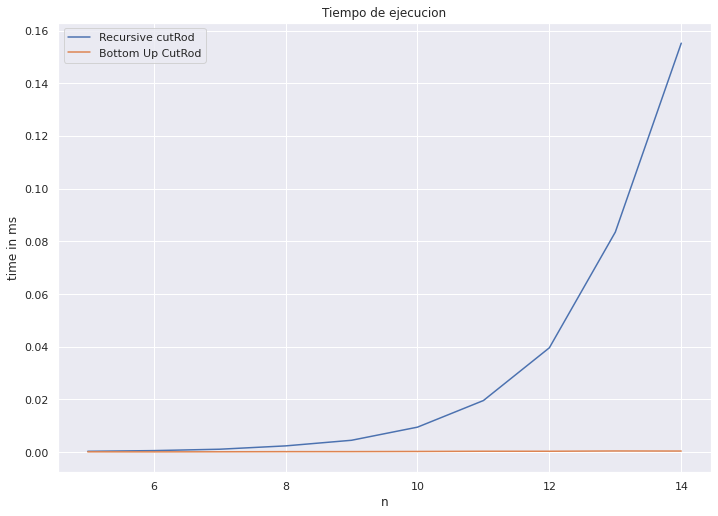

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(5,15):

  A = cutrod_instance_generator(n)
  t = repeat(setup="from __main__ import RecursiveCutRod", stmt=f"RecursiveCutRod({A},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,15):
    
  A = cutrod_instance_generator(n)
  t = repeat(setup="from __main__ import BottomUpCutRod", stmt=f"BottomUpCutRod({A},{n})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)
  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Recursive cutRod", "Bottom Up CutRod"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

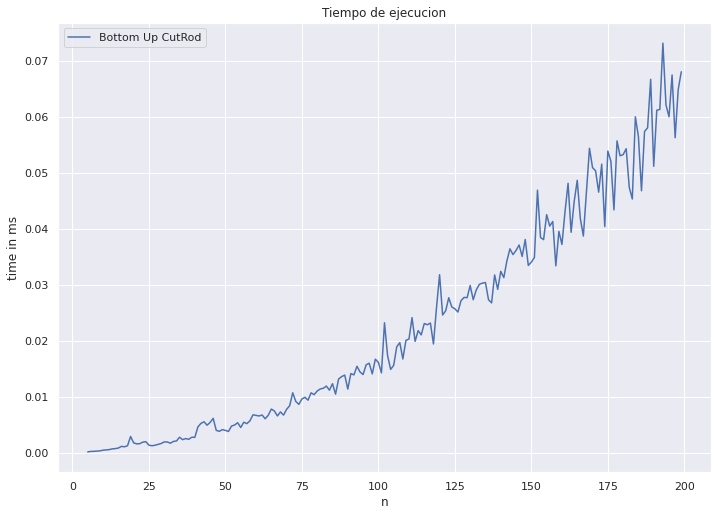

In [20]:
# Tiempo

x=[]
y=[]

for n in range(5,200):

  A = cutrod_instance_generator(n)
  t = repeat(setup="from __main__ import BottomUpCutRod", stmt=f"BottomUpCutRod({A},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  
plt.plot(x,y)
plt.legend(["Bottom Up CutRod"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Al comparar ambos tiempos de ejecución, el alza exponencial del algoritmo recursivo opaca por completo el tiempo de ejecución cuadrático del otro, el cuál si se observa en el segundo gráfico.

Esto tiene sentido considerando que la versión recursiva resuelve una considerable mayor cantidad de subproblemas que el acercamiento Bottom-up, que resuelve solo uno por cada valor menor a $n$.


### 4.2 *Cantidad de sub-problemas*

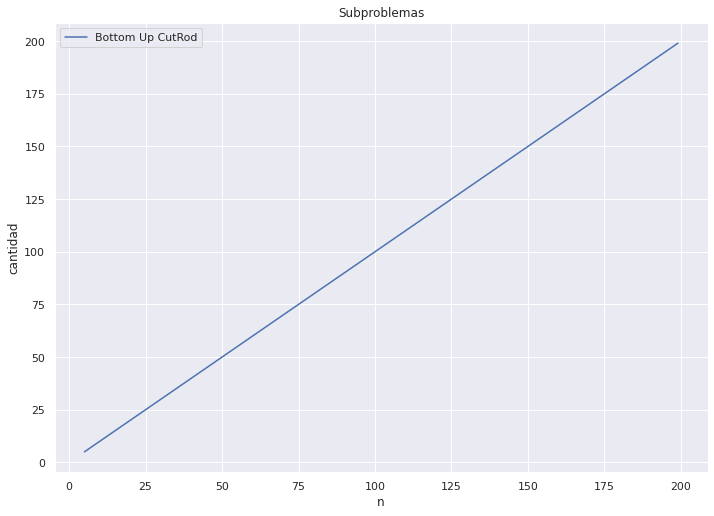

In [23]:
# Cantidad de sub-problemas resueltos

x=[]
y=[n for n in range(5,200)]

for n in range(5,200):

  A = cutrod_instance_generator(n)
  a, b, c = BottomUpCutRod(A,n)

  x.append(c)
  
plt.plot(x,y)
plt.legend(["Bottom Up CutRod"])
plt.title("Subproblemas")

plt.xlabel('n')
plt.ylabel('cantidad')
plt.show()

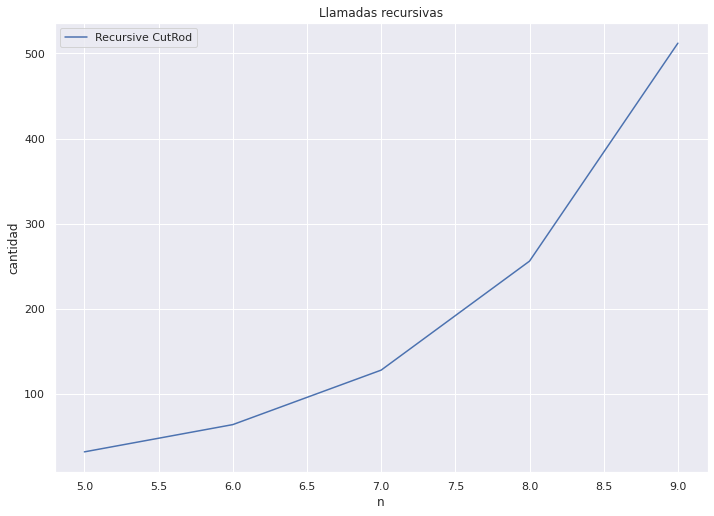

In [32]:
x=[n for n in range(5,10)]
y=[]

for n in range(5,10):

  A = cutrod_instance_generator(n)
  a, b, c = RecursiveCutRod(A,n)

  y.append(b)

plt.plot(x,y)
plt.legend(["Recursive CutRod"])
plt.title("Llamadas recursivas")

plt.xlabel('n')
plt.ylabel('cantidad')
plt.show()

Se observa como el algoritmo recursivo calcula una cantidad exponencial de subproblemas, sobrepasando los 300 cuando $n=8$ dado a que se resuelven todas las combinaciones posibles de cortes en todo subpoblema (iteracion), sin importar si ha sido resuelto antes.

Mientras, la cantidad de subproblemas en la versión bottom up es lineal puesto a que cada subproblema se resuelve una sola vez para un total de $n-1$ subproblemas.